In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train1.csv')

In [3]:
test=pd.read_csv('test2.csv')

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Pre processing the dataset


## Combining the train and test dataset

In [11]:
dataset=[train,test]

In [12]:
for data in dataset:
    data.drop(['Loan_ID'],axis=1,inplace=True)

In [13]:
#checking null values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
type(train['ApplicantIncome'])

pandas.core.series.Series

In [16]:
#filling null values for numeric data with mean values
dataset=[train,test]
for data in dataset:
    data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
   

In [17]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
#filling categorical missing values
dataset=[train,test]
for data in dataset:
    data['Gender'].ffill(inplace=True)
    data['Married'].ffill(inplace=True)
    data['Dependents'].ffill(inplace=True)
    data['Self_Employed'].bfill(inplace=True)
    data['Credit_History'].ffill(inplace=True)
  

In [21]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
#checking value counts of categorical 
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Dependents'].value_counts())
print(train['Self_Employed'].value_counts())
print(train['Credit_History'].value_counts())

Male      500
Female    114
Name: Gender, dtype: int64
Yes    400
No     214
Name: Married, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
No     528
Yes     86
Name: Self_Employed, dtype: int64
1.0    513
0.0    101
Name: Credit_History, dtype: int64


# Corelation and univariate analysis

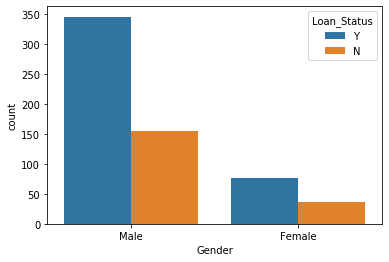

In [23]:
sns.countplot(train['Gender'],hue=train['Loan_Status'])

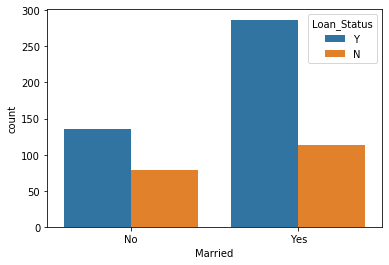

In [24]:
sns.countplot(train['Married'],hue=train['Loan_Status'])

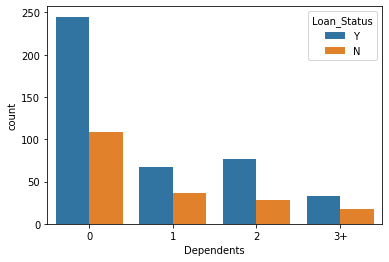

In [25]:
sns.countplot(train['Dependents'],hue=train['Loan_Status'])

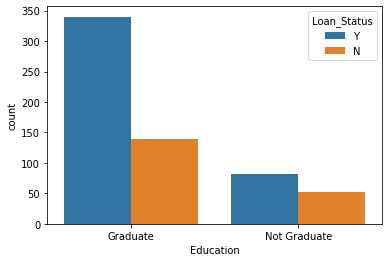

In [26]:
sns.countplot(train['Education'],hue=train['Loan_Status'])

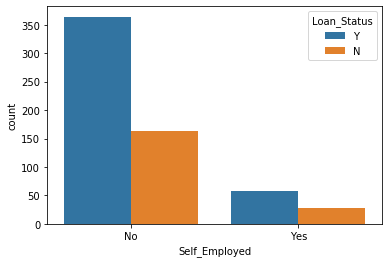

In [27]:
sns.countplot(train['Self_Employed'],hue=train['Loan_Status'])

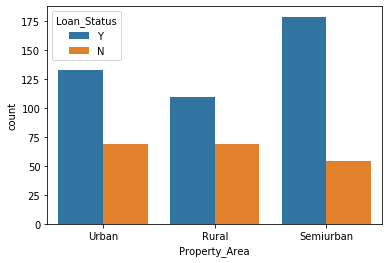

In [28]:
sns.countplot(train['Property_Area'],hue=train['Loan_Status'])

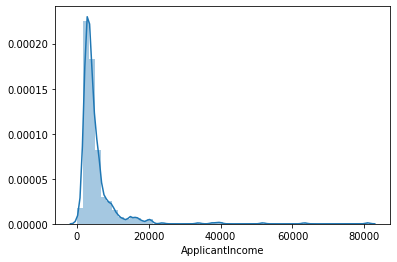

In [29]:
sns.distplot(train['ApplicantIncome'])

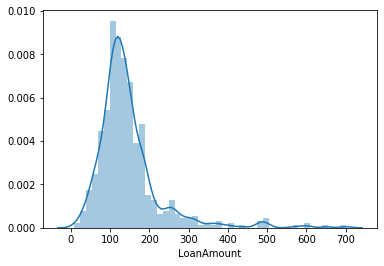

In [30]:
sns.distplot(train['LoanAmount'])

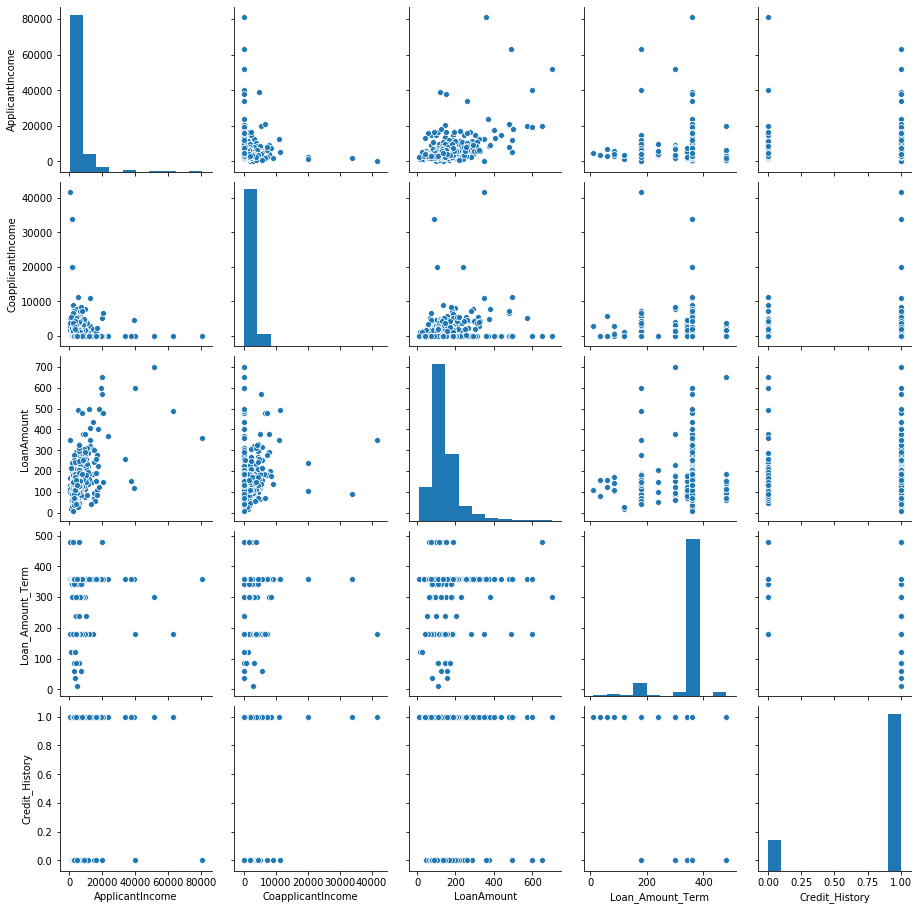

In [31]:
sns.pairplot(data=train)

In [32]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [33]:
#we use log function to make right and left skew to normalization
dataset=[train,test]
for data in dataset:
    data['ApplicantIncome']=np.log(data['ApplicantIncome'])
    data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])
    data['LoanAmount']=np.log(data['LoanAmount'])
    data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])

/Users/garimagajendra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


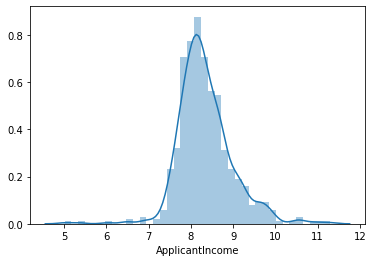

In [34]:
sns.distplot(train['ApplicantIncome'])

In [35]:
#deleting Coapplicantincome as it has -inf values
train.drop(['CoapplicantIncome'],inplace=True,axis=1)
test.drop(['CoapplicantIncome'],inplace=True,axis=1)

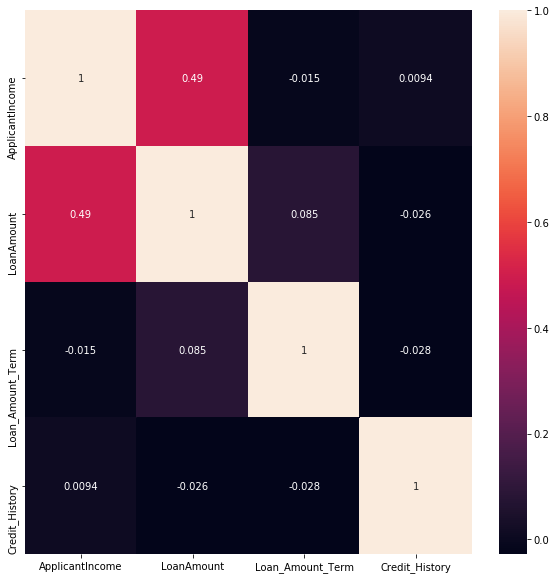

In [36]:
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

# Label Encoding

#### used to normalize the labels. It can be used to transform non numerical labels to numberical labels

In [37]:
from sklearn.preprocessing import LabelEncoder
columns=['Gender','Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
le=LabelEncoder()
dataset=[train,test]

In [38]:
#fit transform-fit label encoderand return encoded labels
for data in dataset:
    for c in columns:
        data[c]=le.fit_transform(data[c])

In [39]:
#as we dont have dependent variable in test dataset,we are encoding it separately for train dataset
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [40]:
train['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [41]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,1


In [42]:
train['Credit_History'].value_counts()

1.0    513
0.0    101
Name: Credit_History, dtype: int64

In [43]:
#float to int conversion
train['Credit_History']=train['Credit_History'].astype(dtype='Int64')
test['Credit_History']=test['Credit_History'].astype(dtype='Int64')

In [44]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1,2,1


# Train-test split

##### iloc returns a pandas series when 1 row is selected, and pandas data frame when multiple rows are selected

In [46]:
#dataset is converted into the array form for trainibg of our model
#: - for all rows
#0:10 - for all columns leaving the last column(target variable)
x=train.iloc[:,0:10].values

In [47]:
y=train.iloc[:,10].values

In [48]:
#checking the -inf values existance
test.loc[test['ApplicantIncome']==-np.inf]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1,0,0,0,0,-inf,4.997212,5.886104,0,0
116,0,0,0,1,0,-inf,5.192957,5.886104,1,1


In [49]:
#replaing inf values with NaN
test.replace([np.inf,-np.inf],np.nan,inplace=True)

In [50]:
#droping the NaN values
test.dropna(inplace=True)

### Using logistic regression and KNN for training the model

# Model training

In [52]:
#logistic regression is a classification algorithm, used when the target variable is categorical in nature 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [53]:
#check the accuracy for logistic regression
logreg=LogisticRegression()
logreg.fit(x,y)
Y_pred=logreg.predict(test.values)
acc_log=round(logreg.score(x,y)*100,2)#2 means upto 2 decimal points
print(round(acc_log,2,),'%')

80.62 %


In [54]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [55]:
#check the accuracy using the KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
Y_pred=knn.predict(x)
acc_knn=round(knn.score(x,y)*100,2)
print(round(acc_knn,2,),'%')

81.11 %


In [56]:
#performance metrics for classification problem
from sklearn.metrics import precision_score,recall_score

In [58]:
print('Precision:',precision_score(y,Y_pred))
print('recall:',recall_score(y,Y_pred))

Precision: 0.8097165991902834
recall: 0.9478672985781991


In [59]:
from sklearn.metrics import f1_score
f1_score(y,Y_pred)

0.8733624454148471

# Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,Y_pred)

array([[ 98,  94],
       [ 22, 400]])

# Pickle

#####  Its a process of converting  python object into a byte stream to store it in a file


In [70]:
#Step for deployment
import pickle

In [71]:
#In project folder directory, data is stored with log_model.pkl name
pickle.dump(logreg,open('log_model.pkl','wb'))

In [72]:
#instead of predicting values for the test data set, we can also predict the values by creating the array 
#with corresponding test dataset
l=logreg.predict([[1,1,1,0,0,8.612345678901234,4.612345678901234,6.612345678901234,1,2]])

In [73]:
#for given values, loan is performed using a dictionary
map={1:'Yes',2:'No'}

In [74]:
#opeing the pickle file we saved earlier in our project and assigning it to a variable 
a=pickle.load(open('log_model.pkl','rb'))

In [75]:
#logreg is replaced with a and we are giving our own values which we used earlier and assigned it to a new variable 
#for prediction of loan approval status
b=a.predict([[1,1,1,0,0,8.612345678901234,4.612345678901234,6.612345678901234,1,2]])

In [76]:
#we are calling the variable b
val=int(b)
print('Loan Approved-',map[val])

Loan Approved- Yes
